In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path="Dataset/Problem-1/logo matching/Ex1/logos"

In [4]:
l=os.listdir(path)

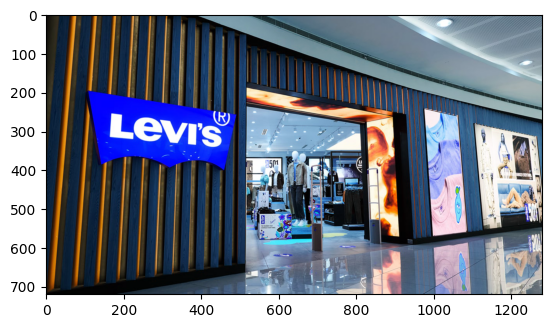

In [6]:
logo_path="Dataset/Problem-1/logo matching/Ex1/levis.jpg"
logo_img=cv2.imread(logo_path)
plt.imshow(logo_img)
plt.show()

In [7]:
Data_dir="/media/ajit-pc/New Volume/19. Computer vision/Assignment2/Dataset/Problem-1/logo matching/Ex1/logos/"

hp.jpg


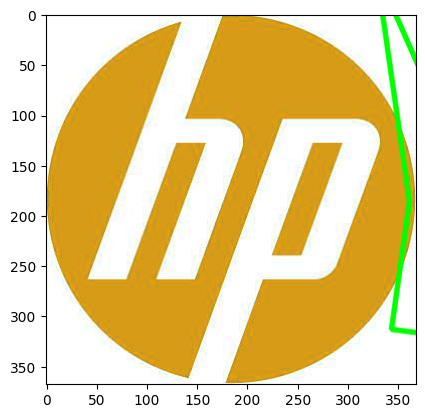

kfc.jpg


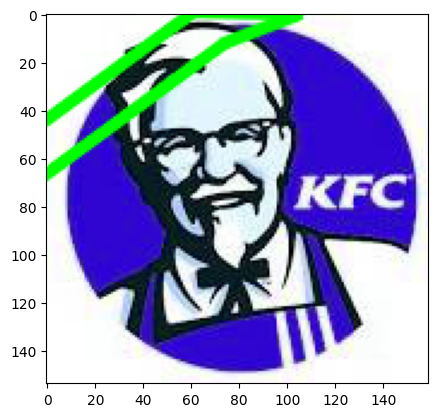

levis.jpg


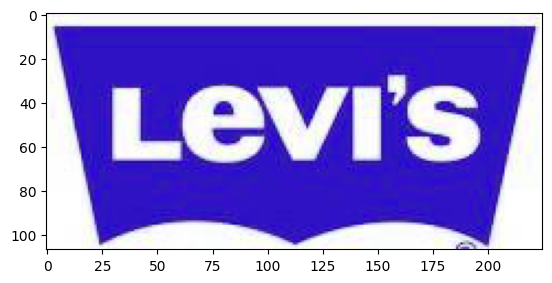

lg.jpg


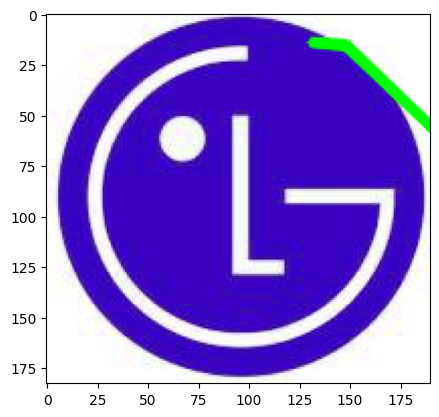

nescafe.jpg


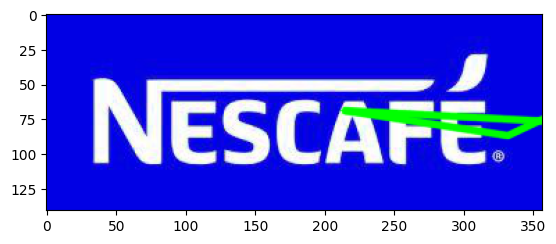

shell.jpg


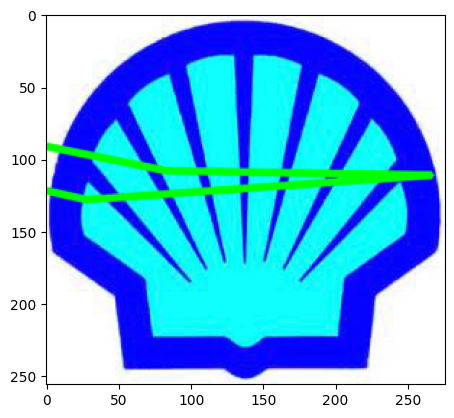

spar.jpg


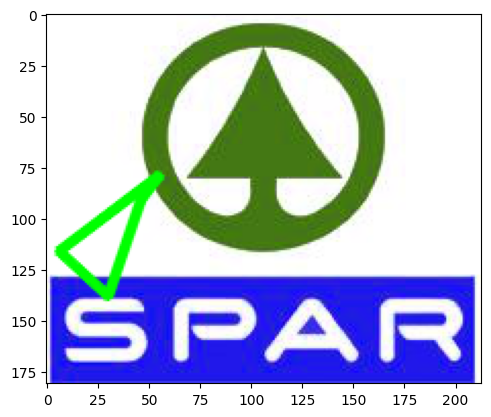

tacobell.jpg


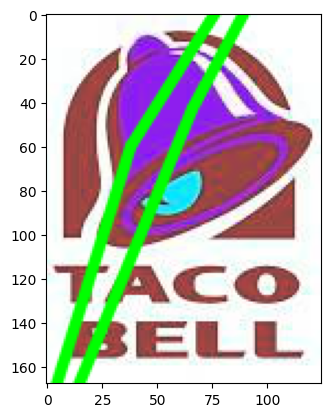

tommyhilfiger.jpg


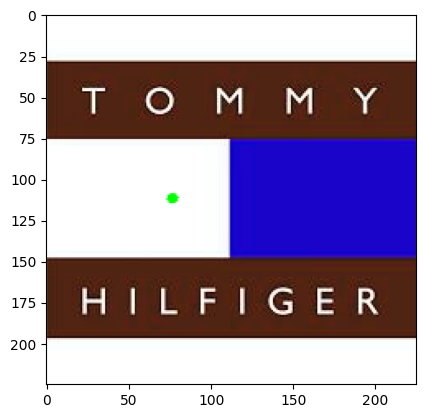

umbro.jpg


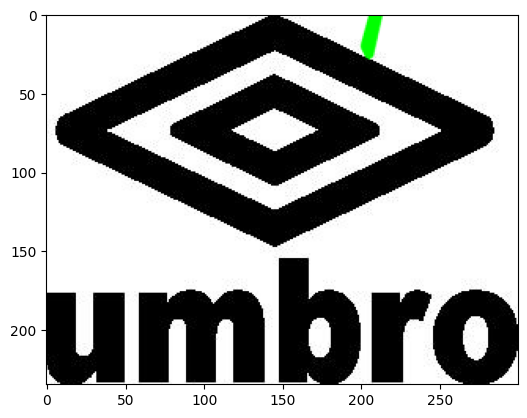

In [15]:
logo_gray=cv2.cvtColor(logo_img, cv2.COLOR_BGR2GRAY)
#logo_height, logo_width = logo_gray.shape
for i in l:
    img_path=Data_dir + i
    print(i)
    img=cv2.imread(img_path)
    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img_gray, None)
    kp2, des2 = sift.detectAndCompute(logo_gray, None)
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    matches = bf.match(des1, des2)

    # Sort the matches by the distance parameter
    matches = sorted(matches, key=lambda x: x.distance)
    # Taking top 10 matches
    top_matches = matches[:10]
    #threshold for minimum matching
    MIN_MATCH_COUNT = 10
    if len(top_matches) >= MIN_MATCH_COUNT:
    # Extract the keypoints of the matches
        src_pts = [kp1[m.queryIdx].pt for m in top_matches]
        dst_pts = [kp2[m.trainIdx].pt for m in top_matches]

        # Find the homography matrix
        M, mask = cv2.findHomography(np.float32(dst_pts), np.float32(src_pts), cv2.RANSAC, 5.0)

        # Get the dimensions of the logo image
        h, w = logo_gray.shape

        # Define the corners of the logo image
        logo_corners = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)

        # Transform the logo corners using the homography matrix
        transformed_logo_corners = cv2.perspectiveTransform(logo_corners, M)

        # Draw a rectangle around the detected logo
        img = cv2.polylines(img, [np.int32(transformed_logo_corners)], True, (0, 255, 0), 3, cv2.LINE_AA)

        # Show the resulting image with the logo detection
        plt.imshow(img)
        plt.show()
    else:
        print("Not enough matches are found - %d/%d" % (len(top_matches), MIN_MATCH_COUNT))
        
